In [3]:
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 
import datetime as dt
data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                      # We must define variables for each list key in the "data"                     
data_u25 = data['u25']                            # dictionary in order to be able to exploit them.
data_u55 = data['u55']
data_u90 = data['u90']
data_v25 = data['v25']
data_v55 = data['v55']
data_v90 = data['v90']

#Define variables for the meander and jetspeed
meander = data['M']
jetspeed = data['Q']


#Conversion of Matlab time data to 'classic python time data.
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                         
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) 
    return day + dayfrac
t = data_t[0,:]
# convert Matlab variable "t" into list of python datetime objects.
py_t = [matlab2datetime(tval) for tval in t]

# Creation of the variable P (Power density of the current).

#Creation of the Power density Jet core variable.
               
Pd_jet = 0.5*1025*(jetspeed*jetspeed*jetspeed)
Pd_jetf = Pd_jet/1000
Pd_jetfm = np.nanmean(Pd_jetf)
Pd_jetfmf = np.full((12808, ),  -1.3775555602729608)

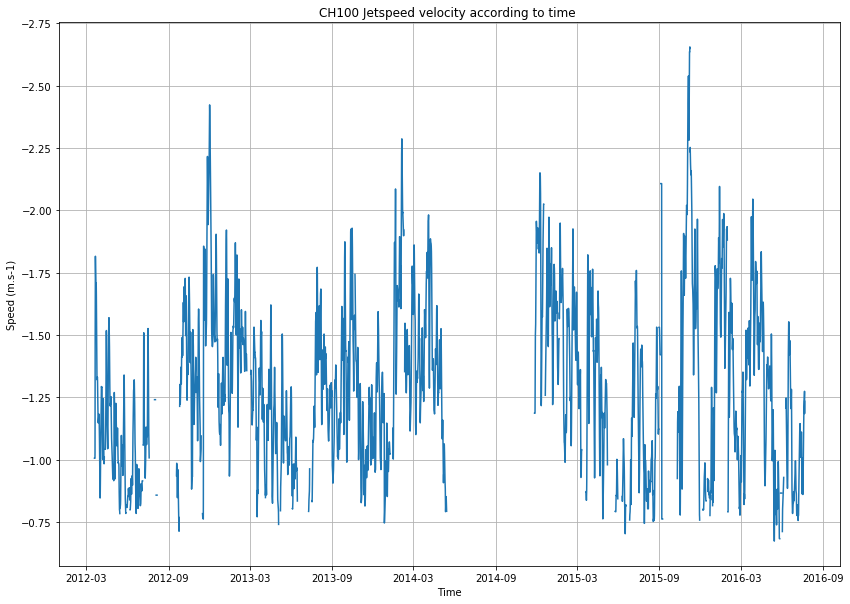

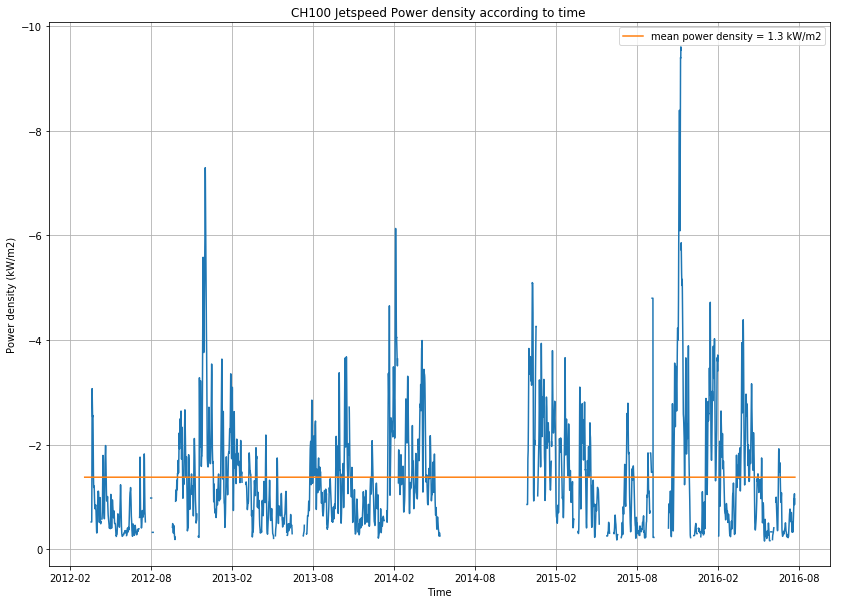

In [7]:
#Graph 3 ; plot the variables py_t and jetspeed
t = data_t[0,:]               
plt.rcParams['figure.figsize'] = (14,10) 
plt.plot(py_t,jetspeed[:,0])
plt.xlabel("Time")             
plt.ylabel("Speed (m.s-1)")
plt.gca().invert_yaxis()
plt.title("CH100 Jetspeed velocity according to time ")
plt.grid(True)                       
plt.show()

#Graph 3 ; plot the variables py_t and jetspeed
t = data_t[0,:]               
plt.rcParams['figure.figsize'] = (14,10) 
plt.plot(py_t,Pd_jetf[:,0])
plt.xlabel("Time")             
plt.ylabel("Power density (kW/m2)")
plt.gca().invert_yaxis()
plt.title("CH100 Jetspeed Power density according to time ")
plt.grid(True)                       
plt.plot(py_t,Pd_jetfmf, label = "mean power density = 1.3 kW/m2")
plt.legend()
plt.show()